In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import HashingVectorizer
import itertools

In [54]:
df=pd.read_csv('/content/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [55]:
labels=df.label
print(labels.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [56]:
from sklearn.model_selection import train_test_split
X=df['text']
y=labels
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [57]:
#Scikit-learn's CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)  #Initialize a TfidfVectorizer
tfidf_train=tfidf_vectorizer.fit_transform(X_train) # Fit and transform train set
tfidf_test=tfidf_vectorizer.transform(X_test)       #transform test set

In [59]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
print(count_df.head())

   00  000  0000  000000031  000035  0001  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0          0       0     0  ...   0        0   0    0        0      0
1   0    0     0          0       0     0  ...   0        0   0    0        0      0
2   0    0     0          0       0     0  ...   0        0   0    0        0      0
3   0    0     0          0       0     0  ...   0        0   0    0        0      0
4   0    0     0          0       0     0  ...   0        0   0    0        0      0

[5 rows x 57195 columns]


In [60]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print(tfidf_df.head())

    00  000  0000  000000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0        0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0        0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0        0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0        0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0        0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0

[5 rows x 57195 columns]


In [61]:
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [62]:
print(count_df.equals(tfidf_df))

False


In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50) 
pac.fit(tfidf_train, y_train)
pred1 = pac.predict(tfidf_test)

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred1))

[[1025   44]
 [  76  946]]


In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred1))

0.9426111908177905


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

        FAKE       0.93      0.96      0.94      1069
        REAL       0.96      0.93      0.94      1022

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091



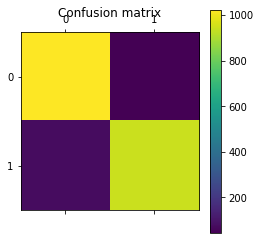

In [67]:
cm1 =metrics.confusion_matrix(y_test, pred1)
plt.matshow(cm1)
plt.title('Confusion matrix')

plt.colorbar()
plt.show()

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)
pred2 = nb_classifier.predict(tfidf_test)

In [69]:
print(confusion_matrix(y_test,pred2))

print(accuracy_score(y_test,pred2))

print(classification_report(y_test,pred2))

[[ 701  368]
 [  21 1001]]
0.8139646102343376
              precision    recall  f1-score   support

        FAKE       0.97      0.66      0.78      1069
        REAL       0.73      0.98      0.84      1022

    accuracy                           0.81      2091
   macro avg       0.85      0.82      0.81      2091
weighted avg       0.85      0.81      0.81      2091



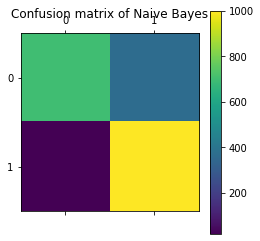

In [70]:
cm2 = confusion_matrix(y_test, pred2)
plt.matshow(cm2)
plt.title('Confusion matrix of Naive Bayes')
plt.colorbar()
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tfidf_train,y_train)
pred3=lr.predict(tfidf_test)

In [72]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred3))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred3))
from sklearn.metrics import classification_report
print(classification_report(y_test,pred3))

0.9225251076040172
[[1017   52]
 [ 110  912]]
              precision    recall  f1-score   support

        FAKE       0.90      0.95      0.93      1069
        REAL       0.95      0.89      0.92      1022

    accuracy                           0.92      2091
   macro avg       0.92      0.92      0.92      2091
weighted avg       0.92      0.92      0.92      2091



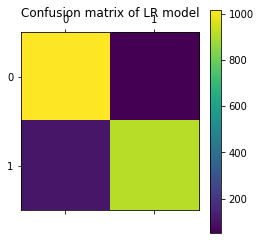

In [73]:
cm3 = confusion_matrix(y_test, pred3)
plt.matshow(cm3)
plt.title('Confusion matrix of LR model')
plt.colorbar()
plt.show()

In [74]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(tfidf_train,y_train)
pred4=clf.predict(tfidf_test)

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred4))


0.9340028694404591


confusion matrix is:
[[1031   38]
 [ 100  922]]


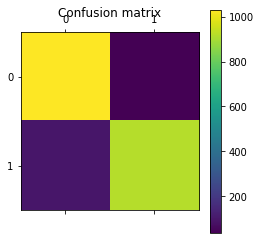

In [76]:
print("confusion matrix is:")
print(confusion_matrix(y_test,pred4))

cm4 = confusion_matrix(y_test, pred4)
plt.matshow(cm4)
plt.title('Confusion matrix')

plt.colorbar()
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.94      1069
        REAL       0.96      0.90      0.93      1022

    accuracy                           0.93      2091
   macro avg       0.94      0.93      0.93      2091
weighted avg       0.94      0.93      0.93      2091

